In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [2]:
!pip install openpyxl
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
train_df.set_index('id', inplace=True)
train_df.head()

,Unnamed: 0.1,Unnamed: 0,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue
id,,,,,,,,,,,,,,,,,,,,,
19792418,0,879,Home in Vancouver · ★4.75 · 1 bedroom · 1 bed ...,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,f,...,4.80,4.82,4.90,4.87,4.69,4.81,f,3,0.77,2108
1015650685503221866,1,6416,Guest suite in Vancouver · ★New · 2 bedrooms ·...,NaN,139792573,Daniel,within a few hours,100%,100%,f,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN,2730
35265562,2,1820,Guest suite in Vancouver · ★4.85 · 2 bedrooms ...,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100%,98%,t,...,4.90,4.78,4.97,4.94,4.90,4.75,f,1,3.22,2254
911948980885194155,3,5346,Home in Vancouver · ★5.0 · 1 bedroom · 1 bed ·...,We are located in a quiet residential neighbor...,22595056,Raymond,NaN,NaN,92%,t,...,5.00,5.00,5.00,5.00,4.86,5.00,f,1,1.28,3187
46069251,4,2484,Guest suite in Vancouver · ★4.93 · 1 bedroom ·...,Kitsilano at it's best! Short walk to all the ...,65683877,Yendi,within an hour,100%,95%,t,...,4.93,4.89,4.97,4.97,4.96,4.85,f,1,2.01,3479


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5352 entries, 19792418 to 19298482
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    5352 non-null   int64  
 1   Unnamed: 0                      5352 non-null   int64  
 2   name                            5352 non-null   object 
 3   neighborhood_overview           3476 non-null   object 
 4   host_id                         5352 non-null   int64  
 5   host_name                       5352 non-null   object 
 6   host_response_time              4263 non-null   object 
 7   host_response_rate              4263 non-null   object 
 8   host_acceptance_rate            4620 non-null   object 
 9   host_is_superhost               5315 non-null   object 
 10  host_listings_count             5352 non-null   int64  
 11  host_total_listings_count       5352 non-null   int64  
 12  neighbourhood               

In [5]:
train_df.drop(train_df.columns[0], axis=1, inplace=True)
train_df.head()

,Unnamed: 0,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue
id,,,,,,,,,,,,,,,,,,,,,
19792418,879,Home in Vancouver · ★4.75 · 1 bedroom · 1 bed ...,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,f,3,...,4.80,4.82,4.90,4.87,4.69,4.81,f,3,0.77,2108
1015650685503221866,6416,Guest suite in Vancouver · ★New · 2 bedrooms ·...,NaN,139792573,Daniel,within a few hours,100%,100%,f,1,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1,NaN,2730
35265562,1820,Guest suite in Vancouver · ★4.85 · 2 bedrooms ...,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100%,98%,t,1,...,4.90,4.78,4.97,4.94,4.90,4.75,f,1,3.22,2254
911948980885194155,5346,Home in Vancouver · ★5.0 · 1 bedroom · 1 bed ·...,We are located in a quiet residential neighbor...,22595056,Raymond,NaN,NaN,92%,t,1,...,5.00,5.00,5.00,5.00,4.86,5.00,f,1,1.28,3187
46069251,2484,Guest suite in Vancouver · ★4.93 · 1 bedroom ·...,Kitsilano at it's best! Short walk to all the ...,65683877,Yendi,within an hour,100%,95%,t,2,...,4.93,4.89,4.97,4.97,4.96,4.85,f,1,2.01,3479


### List of columns contain missing data in the training dataset: ###

In [6]:
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview          1876
neighbourhood                  1876
host_response_time             1089
host_response_rate             1089
reviews_per_month               906
review_scores_checkin           901
review_scores_location          901
review_scores_value             901
review_scores_rating            900
review_scores_accuracy          900
review_scores_cleanliness       900
review_scores_communication     900
host_acceptance_rate            732
price                           665
host_is_superhost                37
beds                             36
dtype: int64


#### 1. Extract information from _name_ column ####
<b>- Assumption 1:</b> For studio, assume there is 1 bed <br><br>
<b>- Assumption 2: </b> After extracting information on number of bedrooms from column _name_, there are 3 rows that has no information about _bedrooms_. From manual observation, those 3 rows are 2 Camper/RV housing and 1 Boat housing. Looking from the whole 5353 rows of training dataset, there are 4 Camper/RV has the number of beds equal to the number of bedrooms. Therefore, to fill the NaN values, we also assume the _bedrooms_ values for Camper/RV are the corresponding number of _beds_. Same for Boat. <br><br>
<b>- Assumption 3: </b> The code currently assume all "shared bath" or "private bath" keywords to return 1 bed. HOWEVER, THIS NEEDS TO BE VERTIFIED MANUALLY TO ENSURE THEY HAD ONLY 1 SHARED BATH OR 1 PRIVATE BATH.

In [7]:
# Regex patterns for extraction
# property_type_pattern = r"^(.*?) in Vancouver"
rating_pattern = r"★([0-9.]+|New)"
bedrooms_pattern = r"(\d+) bedroom"
beds_pattern = r"(\d+) bed"
baths_pattern = r"(\d+) bath"

# Functions to extract each feature
#def extract_property_type(name):
#    match = re.search(property_type_pattern, name)
#    return match.group(1) if match else None

def extract_rating(name):
    match = re.search(rating_pattern, name)
    return float(match.group(1)) if match and match.group(1).replace('.', '', 1).isdigit() else None

def extract_bedrooms(name):
    match = re.search(bedrooms_pattern, name)
    return int(match.group(1)) if match else (0 if 'Studio' in name else None)

def extract_beds(name):
    match = re.search(beds_pattern, name)
    # Return the extracted value as float or np.nan for missing values
    return float(match.group(1)) if match else np.nan

def extract_baths(name):
    # First, try to match the numeric value before "bath" in general
    match = re.search(baths_pattern, name)
    if match:
        return int(match.group(1))
    # Then, handle cases with "shared bath" or "private bath". Assume 
    shared_or_private_match = re.search(r"(\d+)\s+(shared|private)\s+bath", name.lower())
    if shared_or_private_match:
        return int(shared_or_private_match.group(1))  # Extract the numeric value
    # If no match, return None
    return None

# Apply functions to extract features
# train_df['property_type'] = train_df['name'].apply(extract_property_type)
train_df['rating'] = train_df['name'].apply(extract_rating)
train_df['bedrooms'] = train_df['name'].apply(extract_bedrooms)
train_df.loc[train_df['beds'].isnull(), 'beds'] = train_df.loc[train_df['beds'].isnull(), 'name'].apply(extract_beds).astype(float)
train_df['baths'] = train_df['name'].apply(extract_baths)

# Fill missing ratings for "New" as a separate indicator
train_df['is_new_listing'] = train_df['rating'].isnull().astype(int)
train_df['rating'] = train_df['rating'].fillna(0)  # Optional: set "New" ratings to 0 or another placeholder

# Show resulting DataFrame
train_df.head()

,Unnamed: 0,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,monthly_revenue,rating,bedrooms,baths,is_new_listing
id,,,,,,,,,,,,,,,,,,,,,
19792418,879,Home in Vancouver · ★4.75 · 1 bedroom · 1 bed ...,Everything you need is nearby. <br /><br />Hig...,57488206,Jessi,NaN,NaN,NaN,f,3,...,4.69,4.81,f,3,0.77,2108,4.75,1.0,1.0,0
1015650685503221866,6416,Guest suite in Vancouver · ★New · 2 bedrooms ·...,NaN,139792573,Daniel,within a few hours,100%,100%,f,1,...,NaN,NaN,f,1,NaN,2730,0.00,2.0,1.0,1
35265562,1820,Guest suite in Vancouver · ★4.85 · 2 bedrooms ...,Beautiful neighbourhood close to prosperous Ma...,265504225,Alex,within an hour,100%,98%,t,1,...,4.90,4.75,f,1,3.22,2254,4.85,2.0,1.0,0
911948980885194155,5346,Home in Vancouver · ★5.0 · 1 bedroom · 1 bed ·...,We are located in a quiet residential neighbor...,22595056,Raymond,NaN,NaN,92%,t,1,...,4.86,5.00,f,1,1.28,3187,5.00,1.0,1.0,0
46069251,2484,Guest suite in Vancouver · ★4.93 · 1 bedroom ·...,Kitsilano at it's best! Short walk to all the ...,65683877,Yendi,within an hour,100%,95%,t,2,...,4.96,4.85,f,1,2.01,3479,4.93,1.0,1.0,0


In [8]:
# Fill NaN values in 'beds' with 1 if 'name' contains the keyword "Studio"
train_df.loc[
    (train_df['beds'].isnull()) & (train_df['name'].str.contains('Studio', na=False, case=False)),
    'beds'
] = 1

In [9]:
# Fill NaN values in 'bedrooms' with the corresponding values from 'beds'
train_df.loc[train_df['bedrooms'].isnull(), 'bedrooms'] = train_df.loc[train_df['bedrooms'].isnull(), 'beds']

In [10]:
# Handle remaining NaN values in the baths column
def handle_remaining_baths(name):
    # Handle "half-bath", "Shared half-bath", or "Private half-bath" as 1 bath
    if "half-bath" in name.lower():
        return 1  # Assign 1 bath for "half-bath" cases
    if "shared bath" in name.lower():
        return 1  # Assign 1 bath for "shared bath" cases
    if "private bath" in name.lower():
        return 1  # Assign 1 bath for "private bath" cases
    
    # If no bath information, return 0
    return 0

# Apply only to rows where 'baths' is still NaN
train_df.loc[train_df['baths'].isnull(), 'baths'] = train_df.loc[train_df['baths'].isnull(), 'name'].apply(handle_remaining_baths)

In [11]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview          1876
neighbourhood                  1876
host_response_time             1089
host_response_rate             1089
reviews_per_month               906
review_scores_checkin           901
review_scores_location          901
review_scores_value             901
review_scores_rating            900
review_scores_accuracy          900
review_scores_cleanliness       900
review_scores_communication     900
host_acceptance_rate            732
price                           665
host_is_superhost                37
dtype: int64


<br><b>- Assumption 4:</b> When the value of _number_of_reviews_ is 0, we assume that the remaining 7 _review_ columns are all 0. The valid range of _review_ columns is from 1 to 5 <br>

In [12]:
# List of review-related columns
review_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

# Set these columns to 0 for rows where number_of_reviews is 0
train_df.loc[train_df['number_of_reviews'] == 0, review_columns] = 0

In [13]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview     1876
neighbourhood             1876
host_response_time        1089
host_response_rate        1089
host_acceptance_rate       732
price                      665
host_is_superhost           37
review_scores_checkin        1
review_scores_location       1
review_scores_value          1
dtype: int64


From manual observation, 1 row with NaN values in review_scores_checkin, review_scores_location, review_scores_value (as shown above) has the value of 5 in all 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_communication'. Therefore, we put 5 (mean value) into the remaining 3 NaN columns. There is only 1 row that has this issue, so it will not affect the whole 5353 rows of training data. 

DOUBLE CHECK THE TESTING DATA - THERE MIGHT BE MORE ROWS WITH THE SAME ISSUE THAN THIS TRAINING DATA.

In [14]:
# Columns to calculate the average from
average_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_communication'
]

# Columns to fill missing values
target_columns = [
    'review_scores_checkin',
    'review_scores_location',
    'review_scores_value'
]

# Fill missing values in the target columns
for col in target_columns:
    # Calculate the average and fill missing values
    train_df[col] = train_df[col].fillna(
        train_df[average_columns].mean(axis=1)
    )

In [15]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview    1876
neighbourhood            1876
host_response_time       1089
host_response_rate       1089
host_acceptance_rate      732
price                     665
host_is_superhost          37
dtype: int64


<br><b>- Assumption 5:</b> All locations are in Vancouver, British Columbia, Canada <br>

In [16]:
# Fill NaN values in the 'neighbourhood' column with 'Vancouver'
train_df['neighbourhood'] = train_df['neighbourhood'].fillna('Vancouver')

In [17]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview    1876
host_response_time       1089
host_response_rate       1089
host_acceptance_rate      732
price                     665
host_is_superhost          37
dtype: int64


<br>
For NaN values in 'neighborhood_overview', a text "No description provided" will be placed instead.
The following code will identify the most popular keywords in the 'neighborhood_overview' column.

<br>

In [18]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

train_df['neighborhood_overview'] = train_df['neighborhood_overview'].fillna("No description provided")
train_df['neighborhood_overview'] = train_df['neighborhood_overview'].apply(lambda x: re.sub(r'<.*?>', '', str(x)))

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Combine all rows of 'neighborhood_overview' into one large string
all_text = ' '.join(train_df['neighborhood_overview'].dropna().astype(str))

# Remove special characters and make all text lowercase
cleaned_text = re.sub(r'[^\w\s]', '', all_text).lower()

# Tokenize the text into individual words
words = cleaned_text.split()

# Remove stopwords (e.g., "and", "the", "in")
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(50)  # Top 20 most common words

# Display the result
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     Lan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words:
vancouver: 2297
restaurants: 1893
provided: 1886
description: 1882
walk: 1720
downtown: 1531
street: 1471
park: 1447
away: 1223
shops: 1161
neighbourhood: 1100
located: 999
area: 917
walking: 902
drive: 891
shopping: 841
minutes: 809
minute: 758
within: 756
neighborhood: 744
distance: 735
also: 695
west: 694
close: 685
one: 651
city: 638
coffee: 625
place: 620
vancouvers: 617
many: 609
bus: 588
stores: 583
granville: 576
beach: 572
parks: 554
great: 540
quiet: 536
home: 526
community: 519
blocks: 516
main: 513
yaletown: 512
grocery: 503
min: 496
local: 496
best: 487
5: 471
vibrant: 469
stanley: 468
centre: 444


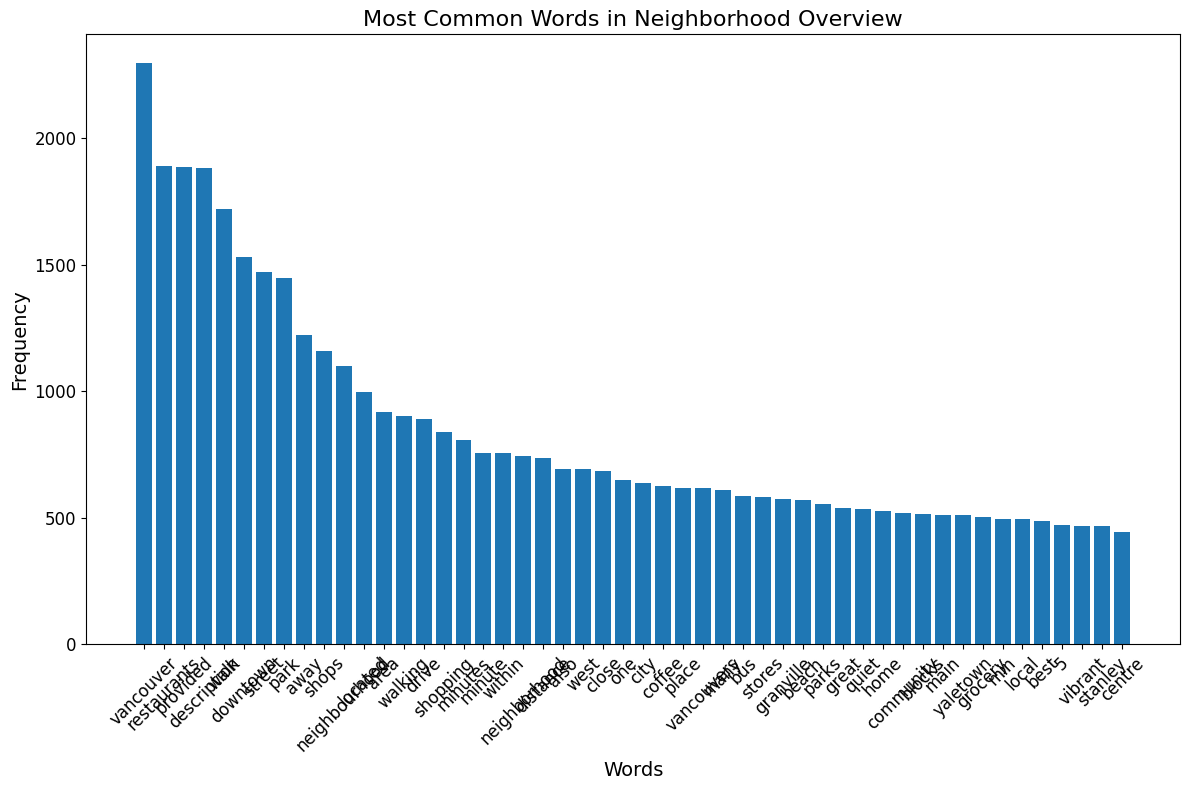

In [19]:
# Keyword distribution visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=45, fontsize=12)  # Rotate and enlarge x-axis labels for readability
plt.yticks(fontsize=12)  # Enlarge y-axis labels
plt.title("Most Common Words in Neighborhood Overview", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()

<br> From the top 10 relavant keywords, extract them into individual columns, with 1 being keyword presented, and 0 being no keyword found in that row. <br>

In [20]:
# Keyword presence feature extraction
def has_keyword(text, keyword):
    return int(bool(re.search(r'\b' + keyword + r'\b', text.lower())))

# Apply keyword search for various categories
keywords = ['restaurant', 'downtown', 'park', 'shops', 'shopping', 'city', 'coffee', 'bus', 'stores'] #'beach', 'quiet', 'transit', 'lively', 'trendy']
for keyword in keywords:
    train_df[f'has_{keyword}'] = train_df['neighborhood_overview'].apply(lambda x: has_keyword(x, keyword))

# Sentiment Analysis
train_df['polarity'] = train_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_df['subjectivity'] = train_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Text Length
train_df['review_length'] = train_df['neighborhood_overview'].apply(lambda x: len(x.split()))

<br> Keyword _shops_ and _shopping_ are quite similar, so we merge them into one new column: 'has_shop'  <br>

In [21]:
# Create the new column 'has_shop' based on the logic
train_df['has_shop'] = (
    (train_df['has_shops'] == 1) | (train_df['has_shopping'] == 1)
).astype(int)

# Delete the original columns 'has_shops' and 'has_shopping'
train_df.drop(['has_shops', 'has_shopping'], axis=1, inplace=True)

<br> Convert the string value in 'host_response_rate' and 'host_acceptance_rate' to numerical values, ranging from 0-1. <br>

In [22]:
#train_df['host_response_rate'] = train_df['host_response_rate'].str.strip('%').astype(float) / 100
#train_df['host_response_rate'].fillna(0, inplace=True) 
#train_df['host_acceptance_rate'] = train_df['host_acceptance_rate'].str.strip('%').astype(float) / 100
#train_df['host_acceptance_rate'].fillna(0, inplace=True) 


# Convert 'host_response_rate' to numerical values
train_df['host_response_rate'] = (
    train_df['host_response_rate']
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)

# Convert 'host_acceptance_rate' to numerical values
train_df['host_acceptance_rate'] = (
    train_df['host_acceptance_rate']
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)

In [23]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

host_response_time      1089
host_response_rate      1089
host_acceptance_rate     732
price                    665
host_is_superhost         37
dtype: int64


<br> Create a correlation matrix to find the correlation between the remaining columns with NaN value presented and 'monthly_revenue' <br>

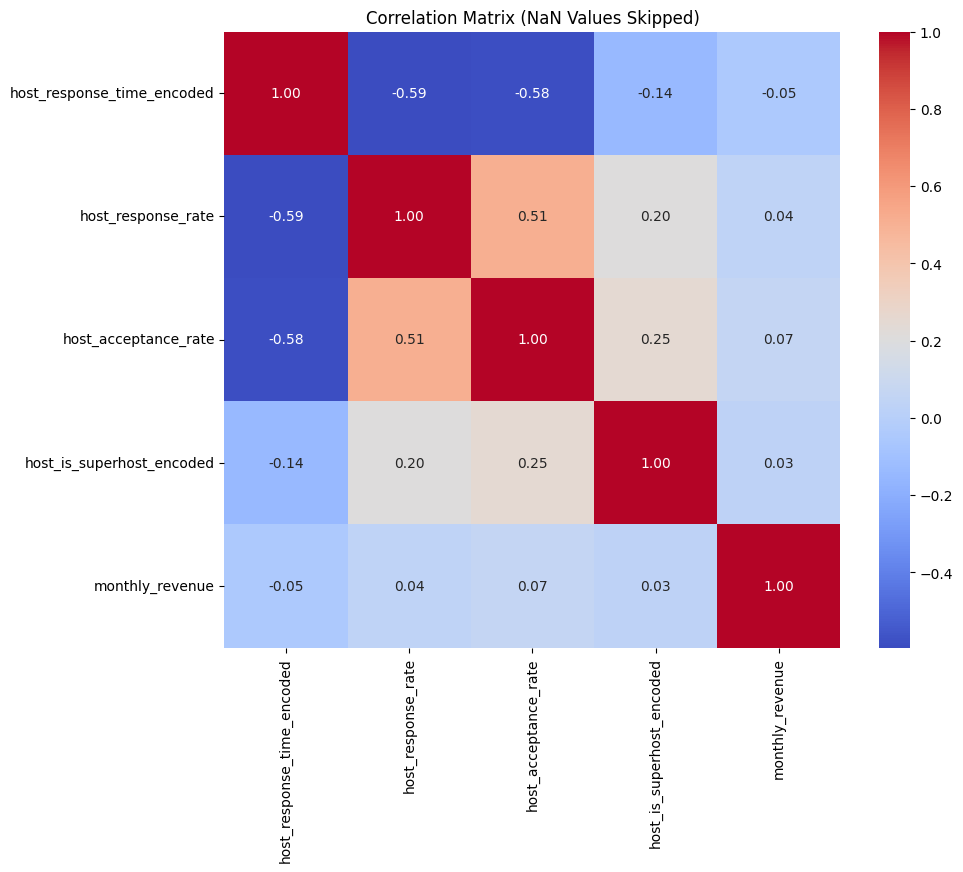

In [24]:
# Step 1: Encode 'host_response_time' into numerical values
response_time_mapping = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}
train_df['host_response_time_encoded'] = train_df['host_response_time'].map(response_time_mapping)

# Step 2: Encode 'host_is_superhost' (f -> 0, t -> 1)
train_df['host_is_superhost_encoded'] = train_df['host_is_superhost'].map({'f': 0, 't': 1})

# Step 3: Select the columns of interest
columns_of_interest = [
    'host_response_time_encoded', 
    'host_response_rate', 
    'host_acceptance_rate', 
    'host_is_superhost_encoded', 
    'monthly_revenue'
]

# Step 4: Drop rows with NaN values in the columns of interest
filtered_data = train_df[columns_of_interest].dropna()

# Step 5: Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Step 6: Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix (NaN Values Skipped)")
plt.show()


<br>
The correlation among the remaining 4 columns with monthly_revenue is too low => Drop them completely
<br>

In [25]:
# List of columns to drop
columns_to_drop = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_response_time_encoded', 'host_is_superhost_encoded']

# Drop the columns from the DataFrame
train_df.drop(columns=columns_to_drop, inplace=True)

In [26]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

price    665
dtype: int64


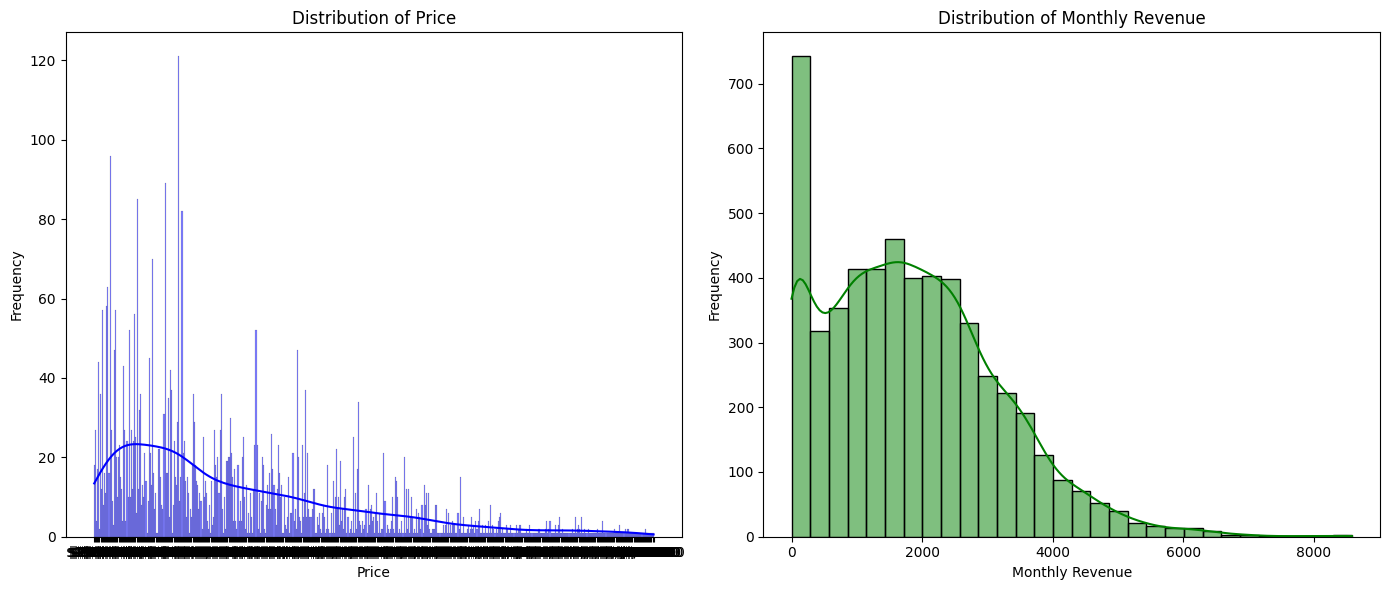

In [27]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Plot distribution of price
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(train_df['price'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot distribution of monthly_revenue
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(train_df['monthly_revenue'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<br>
As the distribution of price highly shifted to the left, using mean value is not ideal here. Instead, we use the median value to replace the NaN values in column 'price'. To make it more accurate, we group the most relavant features (strongest correlation) and calculate the median value based on those factors. 
<br>

In [28]:
train_df['price'] = train_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check correlations of numeric columns with 'price'
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = train_df[numerical_cols].corr()
revenue_correlation = correlation_matrix['price']

print(revenue_correlation)

Unnamed: 0                       -0.007338
host_id                          -0.021705
host_listings_count               0.005377
host_total_listings_count         0.011299
latitude                          0.046788
longitude                        -0.073243
accommodates                      0.221696
beds                              0.198735
price                             1.000000
minimum_nights                    0.002961
maximum_nights                    0.011642
minimum_nights_avg_ntm           -0.000128
maximum_nights_avg_ntm           -0.008973
availability_30                   0.059841
availability_60                   0.050921
availability_90                   0.046747
availability_365                  0.069689
number_of_reviews                -0.038360
number_of_reviews_ltm            -0.042969
review_scores_rating             -0.061133
review_scores_accuracy           -0.062134
review_scores_cleanliness        -0.058927
review_scores_checkin            -0.063504
review_scor

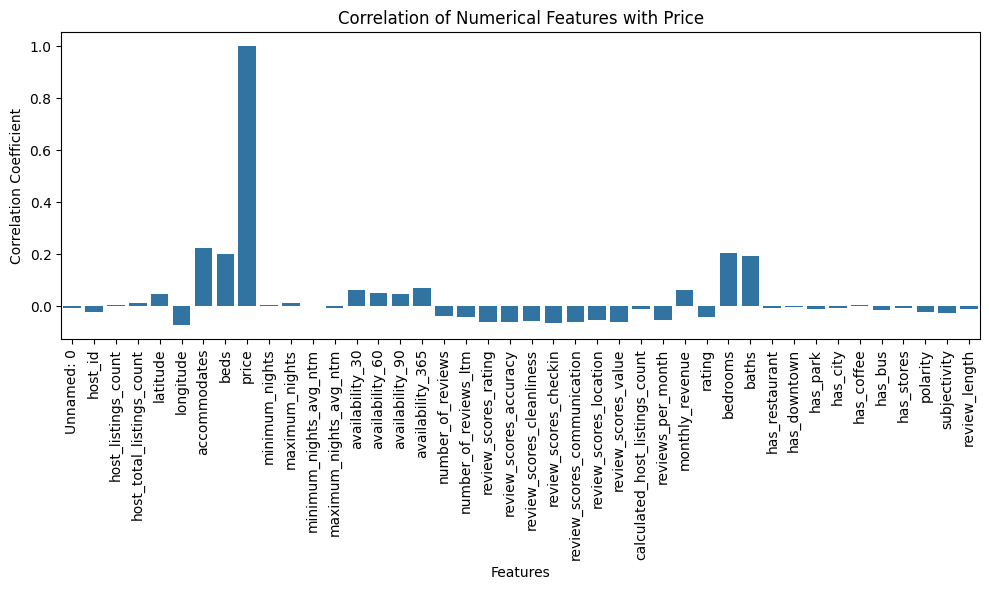

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_correlation.index, y=revenue_correlation.values)
plt.xticks(rotation=90)
plt.title("Correlation of Numerical Features with Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

In [30]:
# Check groups where all values for price are NaN
#grouped = train_df.groupby(['accommodates', 'beds', 'baths', 'bedrooms'])
#empty_groups = grouped['price'].apply(lambda x: x.isnull().all())
#print(empty_groups[empty_groups])  # Display groups with all NaN


In [31]:
# Compute the overall median for price
overall_median = train_df['price'].median()

# Impute missing prices with group median, falling back to overall median
train_df['price'] = train_df.groupby(['accommodates', 'beds', 'baths', 'bedrooms'])['price'].transform(
    lambda x: x.fillna(x.median() if not x.dropna().empty else overall_median)
)

# Fill any remaining NaN values with the overall median
train_df['price'] = train_df['price'].fillna(overall_median)

In [32]:
# Double check the current wrangling process

missing_values_1 = train_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

Series([], dtype: int64)


In [33]:
# Drop amenities
train_df.drop(columns=['amenities'], inplace=True)

In [34]:
# Save the updated DataFrame to a new Excel sheet
train_df.to_excel('cleaned_data.xlsx', index=False)

print("Data saved to 'cleaned_data.xlsx'")

Data saved to 'cleaned_data.xlsx'


<br> <b>However, it is still worth to reconsider about the wrangling process in 5 columns of 'host' and 'price'. Because filling the column 'price' with median values make the distribution graph look like this:<b><br>

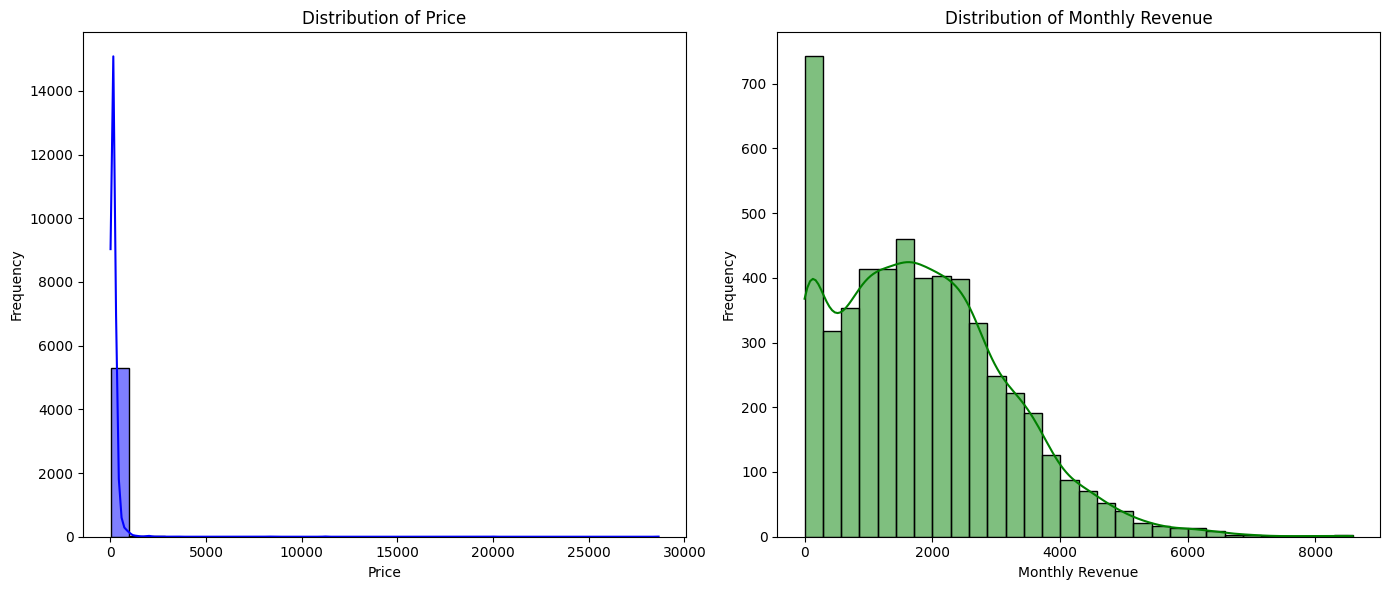

In [35]:
# Set up the figure
plt.figure(figsize=(14, 6))

# Plot distribution of price
plt.subplot(1, 2, 1)  # First subplot
sns.histplot(train_df['price'], kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Plot distribution of monthly_revenue
plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(train_df['monthly_revenue'], kde=True, bins=30, color='green', edgecolor='black')
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

## Wrangling the testing dataset (copy from the process above)

In [36]:
missing_values_1 = test_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

neighborhood_overview          455
neighbourhood                  455
host_response_time             274
host_response_rate             274
reviews_per_month              233
review_scores_rating           232
review_scores_accuracy         232
review_scores_cleanliness      232
review_scores_checkin          232
review_scores_communication    232
review_scores_location         232
review_scores_value            232
host_acceptance_rate           195
price                          175
host_is_superhost               10
beds                             9
dtype: int64


In [37]:
# Wrangling the testing set
# Regex patterns for extraction
# property_type_pattern = r"^(.*?) in Vancouver"
rating_pattern = r"★([0-9.]+|New)"
bedrooms_pattern = r"(\d+) bedroom"
beds_pattern = r"(\d+) bed"
baths_pattern = r"(\d+) bath"

# Functions to extract each feature
#def extract_property_type(name):
#    match = re.search(property_type_pattern, name)
#    return match.group(1) if match else None

def extract_rating(name):
    match = re.search(rating_pattern, name)
    return float(match.group(1)) if match and match.group(1).replace('.', '', 1).isdigit() else None

def extract_bedrooms(name):
    match = re.search(bedrooms_pattern, name)
    return int(match.group(1)) if match else (0 if 'Studio' in name else None)

def extract_beds(name):
    match = re.search(beds_pattern, name)
    # Return the extracted value as float or np.nan for missing values
    return float(match.group(1)) if match else np.nan

def extract_baths(name):
    # First, try to match the numeric value before "bath" in general
    match = re.search(baths_pattern, name)
    if match:
        return int(match.group(1))
    # Then, handle cases with "shared bath" or "private bath"
    shared_or_private_match = re.search(r"(\d+)\s+(shared|private)\s+bath", name.lower())
    if shared_or_private_match:
        return int(shared_or_private_match.group(1))  # Extract the numeric value
    # If no match, return None
    return None

# Apply functions to extract features
# train_df['property_type'] = train_df['name'].apply(extract_property_type)
test_df['rating'] = test_df['name'].apply(extract_rating)
test_df['bedrooms'] = test_df['name'].apply(extract_bedrooms)
test_df.loc[test_df['beds'].isnull(), 'beds'] = test_df.loc[test_df['beds'].isnull(), 'name'].apply(extract_beds).astype(float)
test_df['baths'] = test_df['name'].apply(extract_baths)

# Fill missing ratings for "New" as a separate indicator
test_df['is_new_listing'] = test_df['rating'].isnull().astype(int)
test_df['rating'] = test_df['rating'].fillna(0)  # Optional: set "New" ratings to 0 or another placeholder

# Show resulting DataFrame
test_df.head()

,Unnamed: 0,id,name,neighborhood_overview,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,rating,bedrooms,baths,is_new_listing
0,0,4465400,Home in Vancouver · ★4.98 · 4 bedrooms · 4 bed...,We are less than a block to Kits pool - the la...,23168796,Oliver & Ashleigh,within a few hours,100%,67%,f,...,5.00,4.98,4.88,f,1,0.38,4.98,4.0,5,0
1,1,608629349064811166,Rental unit in Vancouver · 1 bedroom · 1 bed ·...,One of the most eclectic areas in the Lower Ma...,16926150,Jesse,NaN,NaN,NaN,f,...,NaN,NaN,NaN,f,1,NaN,0.00,1.0,1,1
2,2,981894508939312892,Rental unit in Vancouver · ★5.0 · 1 bedroom · ...,Le Soleil Hotel and Suites is situated in the ...,536871978,Ivan,within an hour,100%,95%,f,...,5.00,5.00,4.88,f,4,2.96,5.00,1.0,1,0
3,3,52014961,Guest suite in Vancouver · ★4.79 · 2 bedrooms ...,"Very safe and quite area,also very convenient ...",421206568,Xuerong,within an hour,100%,98%,t,...,4.96,4.77,4.69,f,4,2.53,4.79,2.0,2,0
4,4,836285112356489303,Rental unit in Vancouver · ★5.0 · 1 bedroom · ...,Mount Pleasant is a largely residential area w...,227662329,Jordan,within an hour,100%,100%,f,...,5.00,5.00,5.00,t,134,0.47,5.00,1.0,1,0


Most Common Words:
vancouver: 625
restaurants: 527
description: 457
provided: 455
walk: 412
downtown: 404
street: 365
park: 364
away: 325
neighbourhood: 303
located: 294
shops: 287
area: 239
shopping: 221
walking: 221
minutes: 217
drive: 211
close: 197
within: 193
also: 191
many: 189
minute: 185
neighborhood: 185
distance: 182
one: 176
beach: 175
city: 173
vancouvers: 168
west: 167
home: 167
yaletown: 154
stores: 151
coffee: 149
place: 148
quiet: 146
parks: 144
grocery: 142
granville: 141
best: 139
bus: 125
vibrant: 125
kitsilano: 124
blocks: 124
beautiful: 123
great: 123
location: 122
local: 121
skytrain: 116
store: 116
cafes: 115


[nltk_data] Downloading package stopwords to C:\Users\My
[nltk_data]     Lan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


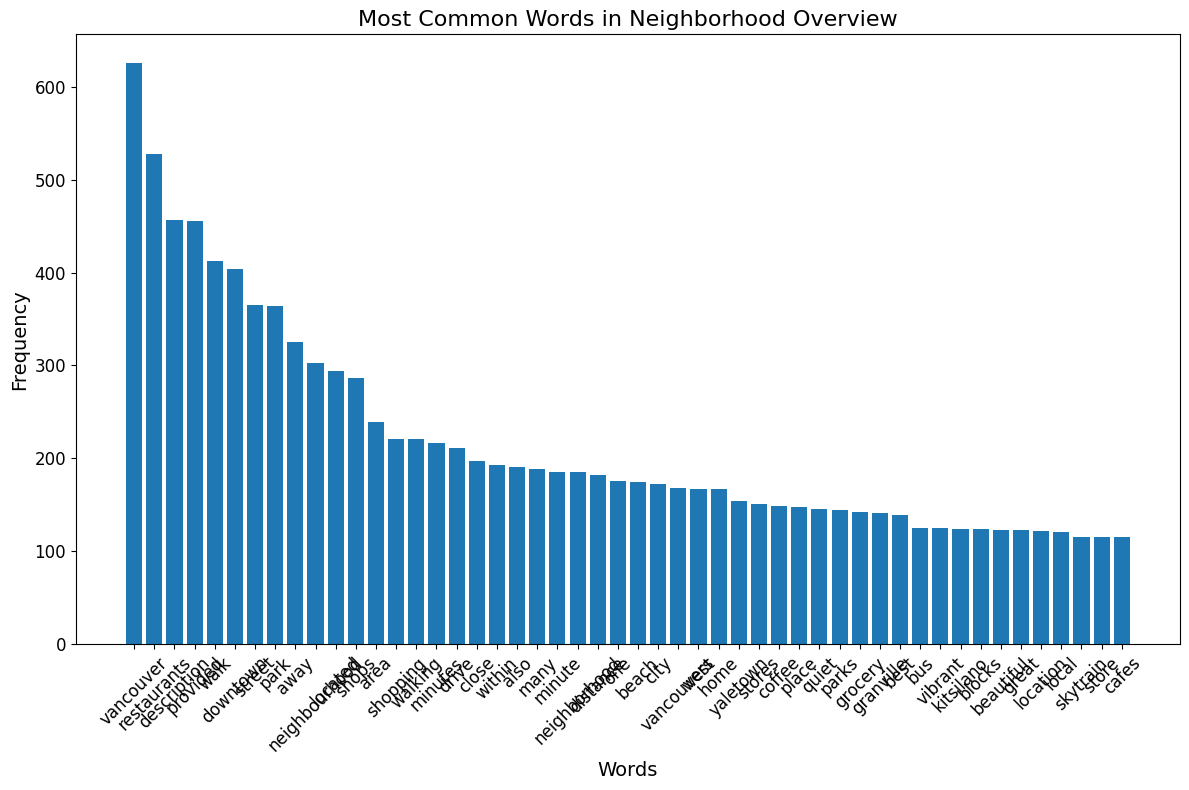

In [38]:
# Fill NaN values in 'beds' with 1 if 'name' contains the keyword "Studio"
test_df.loc[
    (test_df['beds'].isnull()) & (test_df['name'].str.contains('Studio', na=False, case=False)),
    'beds'
] = 1
test_df.loc[test_df['bedrooms'].isnull(), 'bedrooms'] = test_df.loc[test_df['bedrooms'].isnull(), 'beds']

# Handle remaining NaN values in the baths column
def handle_remaining_baths(name):
    # Ensure input is a string
    name = str(name).lower()
    
    # Handle specific cases for "half-bath", "shared bath", or "private bath"
    if "half-bath" in name:
        return 1  # Assign 1 bath for all "half-bath" cases
    if "shared bath" in name:
        return 1  # Assign 1 bath for "shared bath" cases
    if "private bath" in name:
        return 1  # Assign 1 bath for "private bath" cases
    
    # Default to 0 if no information is available
    return 0

# Apply only to rows where 'baths' is still NaN
test_df.loc[test_df['baths'].isnull(), 'baths'] = test_df.loc[test_df['baths'].isnull(), 'name'].apply(handle_remaining_baths).astype(int)


# Apply only to rows where 'baths' is still NaN
#test_df.loc[test_df['baths'].isnull(), 'baths'] = test_df.loc[test_df['baths'].isnull(), 'name'].apply(handle_remaining_baths)

# List of review-related columns
review_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month'
]

# Set these columns to 0 for rows where number_of_reviews is 0
test_df.loc[test_df['number_of_reviews'] == 0, review_columns] = 0

# Columns to calculate the average from
average_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_communication'
]

# Columns to fill missing values
target_columns = [
    'review_scores_checkin',
    'review_scores_location',
    'review_scores_value'
]

# Fill missing values in the target columns
for col in target_columns:
    # Calculate the average and fill missing values
    test_df[col] = test_df[col].fillna(
        test_df[average_columns].mean(axis=1)
    )

test_df['neighbourhood'] = test_df['neighbourhood'].fillna('Vancouver')

import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

test_df['neighborhood_overview'] = test_df['neighborhood_overview'].fillna("No description provided")
test_df['neighborhood_overview'] = test_df['neighborhood_overview'].apply(lambda x: re.sub(r'<.*?>', '', str(x)))

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Combine all rows of 'neighborhood_overview' into one large string
all_text = ' '.join(test_df['neighborhood_overview'].dropna().astype(str))

# Remove special characters and make all text lowercase
cleaned_text = re.sub(r'[^\w\s]', '', all_text).lower()

# Tokenize the text into individual words
words = cleaned_text.split()

# Remove stopwords (e.g., "and", "the", "in")
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the most common words
most_common_words = word_counts.most_common(50)  # Top 20 most common words

# Display the result
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# Create a bar chart with a larger figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
words, counts = zip(*most_common_words)
plt.bar(words, counts)
plt.xticks(rotation=45, fontsize=12)  # Rotate and enlarge x-axis labels for readability
plt.yticks(fontsize=12)  # Enlarge y-axis labels
plt.title("Most Common Words in Neighborhood Overview", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()  # Ensure everything fits without overlapping
plt.show()

In [39]:
# Keyword presence feature extraction
def has_keyword(text, keyword):
    return int(bool(re.search(r'\b' + keyword + r'\b', text.lower())))

# Apply keyword search for various categories
keywords = ['restaurant', 'downtown', 'park', 'shops', 'shopping', 'beach', 'city', 'coffee', 'quiet', 'stores'] #'beach', 'quiet', 'transit', 'lively', 'trendy']
for keyword in keywords:
    test_df[f'has_{keyword}'] = test_df['neighborhood_overview'].apply(lambda x: has_keyword(x, keyword))

# Sentiment Analysis
test_df['polarity'] = test_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.polarity)
test_df['subjectivity'] = test_df['neighborhood_overview'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Text Length
test_df['review_length'] = test_df['neighborhood_overview'].apply(lambda x: len(x.split()))

# Create the new column 'has_shop' based on the logic
test_df['has_shop'] = (
    (test_df['has_shops'] == 1) | (test_df['has_shopping'] == 1)
).astype(int)

# Delete the original columns 'has_shops' and 'has_shopping'
test_df.drop(['has_shops', 'has_shopping'], axis=1, inplace=True)

# Convert 'host_response_rate' to numerical values
test_df['host_response_rate'] = (
    test_df['host_response_rate']
    .astype(str)  # Convert all values to string
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)

# Convert 'host_acceptance_rate' to numerical values
test_df['host_acceptance_rate'] = (
    test_df['host_acceptance_rate']
    .astype(str)  # Convert all values to string
    .str.strip('%')  # Remove the '%' character
    .astype(float)    # Convert the string to float
    / 100             # Convert percentage to a decimal
)


# List of columns to drop
columns_to_drop = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost']

# Drop the columns from the DataFrame
test_df.drop(columns=columns_to_drop, inplace=True)

test_df['price'] = test_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Compute the overall median for price
overall_median = test_df['price'].median()

# Impute missing prices with group median, falling back to overall median
test_df['price'] = test_df.groupby(['accommodates', 'beds', 'baths', 'bedrooms'])['price'].transform(
    lambda x: x.fillna(x.median() if not x.dropna().empty else overall_median)
)

# Fill any remaining NaN values with the overall median
test_df['price'] = test_df['price'].fillna(overall_median)

# Verify that no NaN values remain
print(f"Remaining NaN values in price: {test_df['price'].isnull().sum()}")

# Drop amenities
test_df.drop(columns=['amenities'], inplace=True)

Remaining NaN values in price: 0


In [40]:
missing_values_1 = test_df.isnull().sum()
print(missing_values_1[missing_values_1 > 0].sort_values(ascending=False))  # Columns with missing data

Series([], dtype: int64)


In [41]:
# Save the updated DataFrame to a new Excel sheet
test_df.to_excel('cleaned_testing.xlsx', index=False)

print("Data saved to 'cleaned_testing.xlsx'")

Data saved to 'cleaned_testing.xlsx'


## Training with Neural Network (NN)

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

# Define Dataset class
class AirbnbDataset(Dataset):
    def __init__(self, features, targets=None):
        self.features = features
        self.targets = targets

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        if self.targets is not None:
            return self.features[idx], self.targets[idx]
        return self.features[idx]

# Define Neural Network
class RevenuePredictor(nn.Module):
    def __init__(self, input_dim):
        super(RevenuePredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def preprocess_data(train_df, test_df):
    # Save the original test ids
    test_ids = test_df.id

    # Separate features and target
    y_train = train_df['monthly_revenue']
    train_df = train_df.drop(columns=['monthly_revenue'])

    # Columns for preprocessing
    cat_features = ['host_is_superhost',
                    'neighbourhood_cleansed', 'property_type', 'room_type']
    num_features = [#'price', 
                    'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
                    'maximum_nights_avg_ntm', #'availability_30', 'availability_60',
                    #'availability_90', 'availability_365', 
                    'number_of_reviews','number_of_reviews_ltm', 
                    'review_scores_rating', 'review_scores_accuracy',
                    'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location',
                    'review_scores_value', 'reviews_per_month', 
                    'bedrooms', 'beds', 'baths', 'accommodates', 
                    'has_restaurant', 
                    'has_downtown', 
                    'has_park', 
                    'has_city', 
                    #'has_coffee',#	'has_bus', 
                    'has_stores', #'rating',
                    'polarity', 'subjectivity', 
                    #'review_length', 
                    'has_shop'
                   ]

    # Keep only the columns that exist in the dataset
    cat_features = [col for col in cat_features if col in train_df.columns]
    num_features = [col for col in num_features if col in train_df.columns]

    # Define transformers
    num_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_features),
            ('cat', cat_transformer, cat_features)
        ]
    )

    # Fit and transform training data
    X_train = preprocessor.fit_transform(train_df).toarray()  # Convert sparse to dense
    X_test = preprocessor.transform(test_df).toarray()        # Convert sparse to dense

    return X_train, y_train.values, X_test, test_ids

# Train Neural Network
def train_nn(X_train, y_train, input_dim, epochs=50, batch_size=32, lr=0.001):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Convert to PyTorch tensors
    train_dataset = AirbnbDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize model, loss, and optimizer
    model = RevenuePredictor(input_dim).to(device)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for features, targets in train_loader:
            features, targets = features.to(device), targets.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

    return model

# Predict with Neural Network
def predict_nn(model, X_test):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()

    # Convert to PyTorch tensors
    test_dataset = AirbnbDataset(torch.FloatTensor(X_test))
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    predictions = []
    with torch.no_grad():
        for features in test_loader:
            features = features.to(device)
            outputs = model(features)
            predictions.extend(outputs.cpu().numpy().squeeze())

    return predictions

# Main Execution
if __name__ == "__main__":
    # Preprocess data without modifying the id column
    X_train, y_train, X_test, test_ids = preprocess_data(train_df, test_df)

    # Train neural network
    input_dim = X_train.shape[1]
    trained_model = train_nn(X_train, y_train, input_dim, epochs=50, batch_size=32)

    # Make predictions on the test set
    predictions = predict_nn(trained_model, X_test)

    # Create submission DataFrame with original test ids
    submission = pd.DataFrame({
        'id': test_ids,  # Use the saved test_ids directly
        'monthly_revenue': predictions
    })

    # Reindex to ensure order matches the original test set
    submission = submission.set_index('id').reindex(test_ids).reset_index()

    # Save submission
    submission.to_csv('submission_nn.csv', index=False)
    print("Predictions saved to submission_nn.csv")


C:\Users\My Lan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Epoch 1/50, Loss: 4741078.4234
Epoch 2/50, Loss: 1992057.4230
Epoch 3/50, Loss: 1380470.2504
Epoch 4/50, Loss: 1338240.0387
Epoch 5/50, Loss: 1317157.1555
Epoch 6/50, Loss: 1296118.7932
Epoch 7/50, Loss: 1281835.1546
Epoch 8/50, Loss: 1273687.3339
Epoch 9/50, Loss: 1265968.3962
Epoch 10/50, Loss: 1256646.7835
Epoch 11/50, Loss: 1254734.7814
Epoch 12/50, Loss: 1251154.7323
Epoch 13/50, Loss: 1245665.0791
Epoch 14/50, Loss: 1240454.6179
Epoch 15/50, Loss: 1242864.2574
Epoch 16/50, Loss: 1238194.0134
Epoch 17/50, Loss: 1244835.9771
Epoch 18/50, Loss: 1244169.3110
Epoch 19/50, Loss: 1232938.2876
Epoch 20/50, Loss: 1239135.5112
Epoch 21/50, Loss: 1229709.5733
Epoch 22/50, Loss: 1230705.3430
Epoch 23/50, Loss: 1233255.9431
Epoch 24/50, Loss: 1230960.2991
Epoch 25/50, Loss: 1232382.1845
Epoch 26/50, Loss: 1227369.0956
Epoch 27/50, Loss: 1228326.7783
Epoch 28/50, Loss: 1232291.7894
Epoch 29/50, Loss: 1229107.8080
Epoch 30/50, Loss: 1234352.8121
Epoch 31/50, Loss: 1230983.6912
Epoch 32/50, Loss

## Training with Linear Regression (LR)

In [43]:
# Linear regression
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#Select features and target
features = ['accommodates', 'beds', 'baths', 'bedrooms', #'price', 
            #'availability_90', 'availability_365', 'number_of_reviews', 
            'review_scores_rating', 'review_scores_cleanliness', 
            'review_scores_communication', 'review_scores_location', 
            #'review_scores_value',
            'polarity', 'subjectivity',            
           ]

target = 'monthly_revenue'

# Define X (features) and y (target)
X = train_df[features]
y = train_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved as 'linear_regression_model.pkl'")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Show model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients)


Model saved as 'linear_regression_model.pkl'
Linear Regression Model Performance:
Mean Absolute Error (MAE): 917.34
Mean Squared Error (MSE): 1278891.10
Root Mean Squared Error (RMSE): 1130.88
R-squared (R²): 0.21

Model Coefficients:
                       Feature  Coefficient
4         review_scores_rating   369.707815
8                     polarity   208.249165
0                 accommodates   197.331919
3                     bedrooms   145.358801
5    review_scores_cleanliness    64.597712
2                        baths    52.716254
1                         beds    46.184887
9                 subjectivity   -10.803164
6  review_scores_communication  -114.296030
7       review_scores_location  -206.510259


In [44]:
import joblib
import pandas as pd

# Load the saved model
linear_regression_model = joblib.load('linear_regression_model.pkl')

# Ensure the test dataset contains only the necessary features
model_testing_data = test_df[features].copy()

# Handle missing values in the test dataset
model_testing_data = model_testing_data.fillna(0)  # Replace NaN with 0 or an appropriate value

# Make predictions on the testing data
predicted_rev = linear_regression_model.predict(model_testing_data)

# Create a DataFrame for the predicted revenue
predicted_rev_df = pd.DataFrame(predicted_rev, columns=['monthly_revenue'])

# Combine the predictions with the test dataset (assuming the test dataset has an 'id' column)
linear_regression_dataset = pd.concat([test_df['id'], predicted_rev_df], axis=1)

# Display the result
print(linear_regression_dataset.head())
print("NAs: ", linear_regression_dataset['monthly_revenue'].isna().sum())


                   id  monthly_revenue
0             4465400      3495.515440
1  608629349064811166       968.635173
2  981894508939312892      1950.493078
3            52014961      2151.763014
4  836285112356489303      1523.416141
NAs:  0


In [46]:
linear_regression_dataset.to_csv('linear_regression.csv', index=False)

## END
The remaining code are from Mr. SS

In [ ]:
X_test = test_df[features]

# Scale the test features using the same scaler used for training
X_test_scaled = scaler.transform(X_test)  # Use the scaler already fitted on training data

# Predict monthly revenue for the test set
test_df['monthly_revenue'] = regressor.predict(X_test_scaled)

# Save the predictions in the required format for submission
submission = test_df[['id', 'monthly_revenue']]  # Replace 'id' with the appropriate column name in your test set
submission.to_csv('submission.csv', index=False)

print("Predictions for the test set have been saved to submission.csv")

In [107]:
X = train_df.drop(columns = ['monthly_revenue','name', 'host_name'])
y = train_df['monthly_revenue']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [109]:
X_train.columns

Index(['Unnamed: 0', 'neighborhood_overview', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'rating',
       'bedrooms', 'baths', 'is_new_listing', 'has_restaurant', 'has_downtown',
       'has_park', 'has_city', 'has_coffee', 'has_bus', 'has_stores',
       'polarity', 'subjectivity', 'review_length', 'has_sho

In [110]:
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "within a week": 4
}
X_train['host_response_time'] = X_train['host_response_time'].map(response_time_mapping)

KeyError: 'host_response_time'

In [35]:
numeric_features = [
    'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count',
    'accommodates', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365',
    'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'rating', 'bedrooms', 'baths',
    'review_length', 'polarity', 'subjectivity', 'latitude', 'longitude'
]

categorical_features = ['property_type', 'room_type', 'neighbourhood', 'neighbourhood_cleansed']

ordinal_features = ['host_response_time'] 

binary_features = [
    'host_is_superhost', 'instant_bookable', 'is_new_listing', 'has_park', 'has_restaurant', 
    'has_shopping', 'has_beach', 'has_quiet', 'has_transit', 'has_lively', 'has_trendy'
]

In [43]:
numeric_transformer = StandardScaler()

In [47]:
ordinal_transformer = OrdinalEncoder(
    categories = [response_time_mapping], 
    dtype = int)

In [48]:
binary_transformer = OneHotEncoder(
    handle_unknown="ignore", 
    sparse_output=False, 
    drop='if_binary', 
    dtype = int
)

In [49]:
si = SimpleImputer(strategy="constant", fill_value="missing")

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, dtype = int)

categorical_transformer = make_pipeline(si, ohe)

In [52]:
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (ordinal_transformer, ordinal_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    #("drop", drop_features)
)

In [53]:
transformed_df = preprocessor.fit_transform(X_train)

ValueError: could not convert string to float: '$123.00'